# Assignment 6 (10 Points): Models

## Team 5
#### Authors: Ziwei Cheng and Ethan Meyer

In [1]:
library(tidyverse)
library(modelr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Q1 (5 points): Reproduce the following outcome by regressing ```Petal.Length``` on ```Petal.Width``` using the ```iris``` dataset and the following commands:

```
group_by, nest, mutate, map, function, broom::tidy, lm, unnest, select
```

### Method 1:
#### Author: Ziwei Cheng (ziwei-cheng)

In [5]:
#group_by and nest species
tidy<-iris%>%
group_by(Species)%>%
nest()

#have the regression function
regression <- function(df) {
    lm(Petal.Length ~ Petal.Width, data = df)
}

tidy%>%
mutate(model = map(data, regression))%>%
mutate(model = map(model, broom::tidy)) %>% 
unnest(model)%>%
select(Species,term:p.value)

Species,term,estimate,std.error,statistic,p.value
setosa,(Intercept),1.3275634,0.0599594,22.141037,7.676120e-27
setosa,Petal.Width,0.5464903,0.2243924,2.435422,1.863892e-02
versicolor,(Intercept),1.7812754,0.2838234,6.276000,9.484134e-08
versicolor,Petal.Width,1.8693247,0.2117495,8.827999,1.271916e-11
virginica,(Intercept),4.2406526,0.5612870,7.555230,1.041600e-09
virginica,Petal.Width,0.6472593,0.2745804,2.357267,2.253577e-02


### Method 2:
#### Author: Ethan Meyer (etme9299)

In [6]:
iris  %>% group_by(Species)  %>% 
    nest()  %>% 
    mutate(models = map(data, function(.) lm(Petal.Length ~ Petal.Width, data = .)),
            output = map(models, broom::tidy))  %>% 
    unnest(cols = output) %>% 
    select(Species, term, estimate, std.error, statistic, p.value)

Species,term,estimate,std.error,statistic,p.value
setosa,(Intercept),1.3275634,0.0599594,22.141037,7.676120e-27
setosa,Petal.Width,0.5464903,0.2243924,2.435422,1.863892e-02
versicolor,(Intercept),1.7812754,0.2838234,6.276000,9.484134e-08
versicolor,Petal.Width,1.8693247,0.2117495,8.827999,1.271916e-11
virginica,(Intercept),4.2406526,0.5612870,7.555230,1.041600e-09
virginica,Petal.Width,0.6472593,0.2745804,2.357267,2.253577e-02


Species,term,estimate,std.error,statistic,p.value
setosa,(Intercept),1.3275634,0.0599594,22.141037,7.676120e-27
setosa,Petal.Width,0.5464903,0.2243924,2.435422,1.863892e-02
versicolor,(Intercept),1.7812754,0.2838234,6.276000,9.484134e-08
versicolor,Petal.Width,1.8693247,0.2117495,8.827999,1.271916e-11
virginica,(Intercept),4.2406526,0.5612870,7.555230,1.041600e-09
virginica,Petal.Width,0.6472593,0.2745804,2.357267,2.253577e-02


### Q2 (5 points): Reproduce the following figure by regressing ```Petal.Length``` on ```Petal.Width``` using the ```iris``` dataset and the following commands:

```
group_by, nest, mutate, map, function, add_predictions, lm, unnest, select, ggplot, geom_point, aes, color, geom_line
```

### Method 1:
#### Author: Ziwei Cheng (ziwei-cheng)
* Uses all appropriate functions

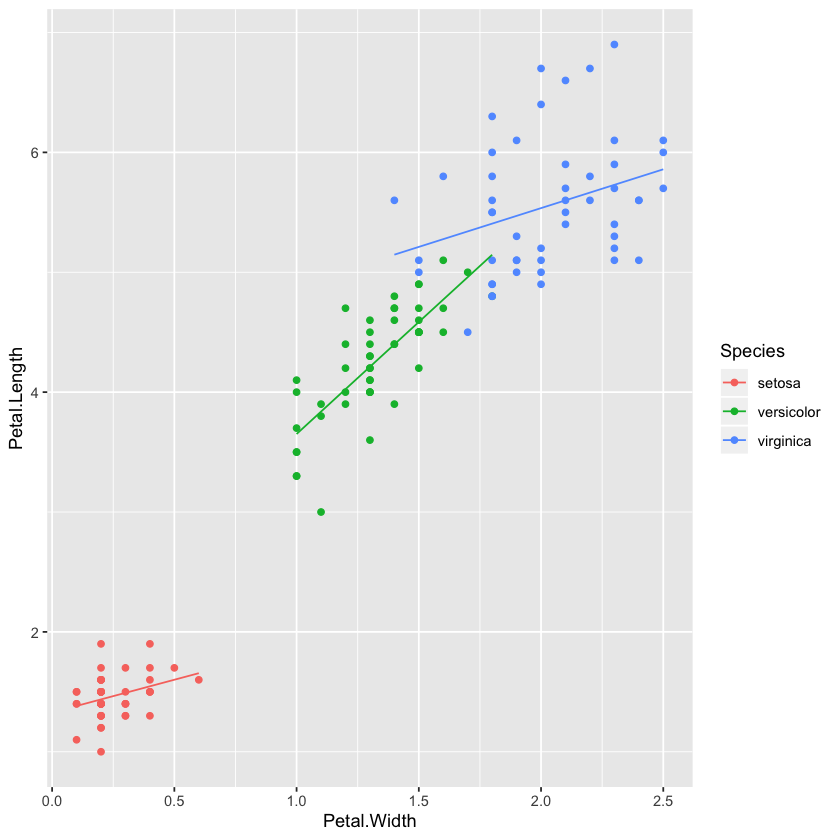

In [2]:
iris%>%
group_by(Species)%>%
nest()%>%
mutate(model=map(data,function(df) lm(Petal.Length~Petal.Width, data=df)),
                 predictions=map2(data,model,add_predictions))%>%
       unnest(cols=predictions)%>%
       select(Species,Petal.Length,Petal.Width,pred)%>%
       ggplot()+
       geom_point(aes(x=Petal.Width,y=Petal.Length,color=Species))+
       geom_line(aes(x=Petal.Width,y=pred,color=Species))

### Method 2:
#### Author: Ethan Meyer (etme9299)
* Uses all appropriate functions

In [2]:
data2<-iris  %>% 
    group_by(Species)  %>% 
    nest()  %>% 
    mutate(models = map(data, function(.) lm(Petal.Length ~ Petal.Width, data = .)),
                       pred = map2(data, models, add_predictions))  %>% 
    unnest(cols = pred)  %>% 
    select(Petal.Width, Petal.Length, Species, pred)

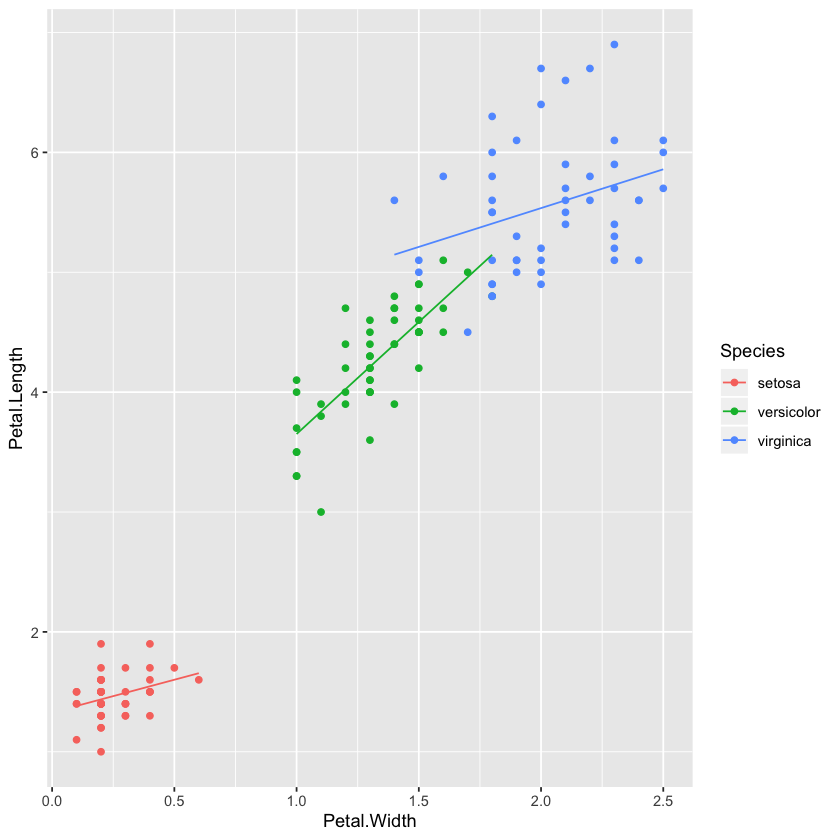

In [3]:
ggplot(data2) +
    geom_point(aes(x = Petal.Width, y = Petal.Length, color = Species)) +
    geom_line(aes(x = Petal.Width, y = pred, color = Species))

### Method 3:
#### Author: Ziwei Cheng (ziwei-cheng)
* does not use all commands

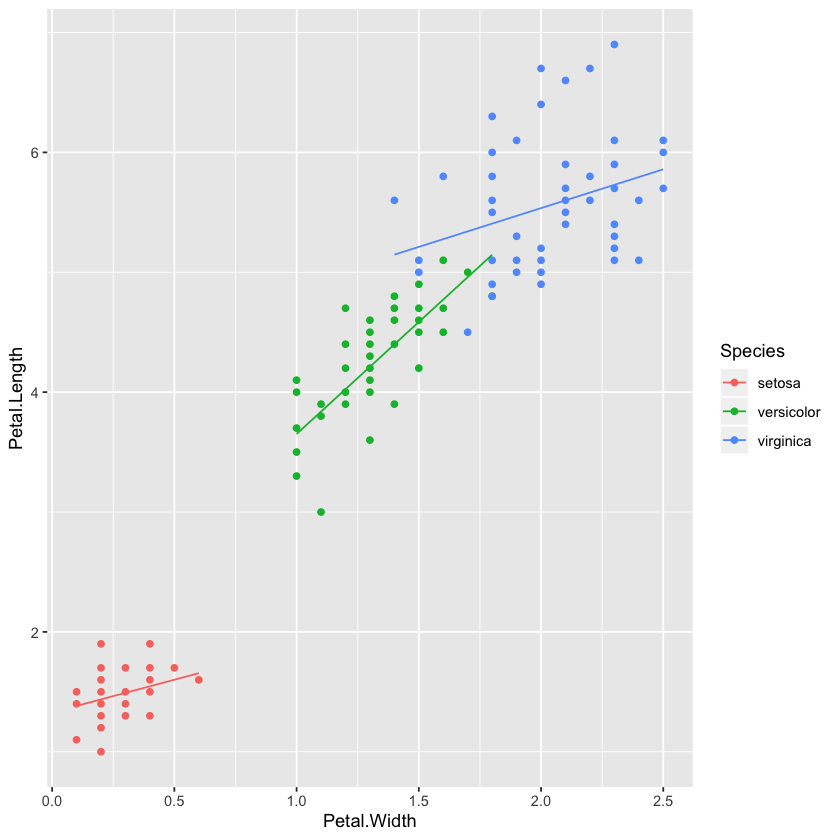

In [5]:
graph<-iris%>%
group_by(Species,Petal.Width,Petal.Length)%>%
nest()

#model regression based on species
model <- lm(Petal.Length ~ Petal.Width*Species, data = iris)

#add predictions base on the model
graph<-graph%>%
add_predictions(model)

#graph
ggplot(graph)+
geom_point(aes(x=Petal.Width,y=Petal.Length,color=Species))+
geom_line(aes(x=Petal.Width,y=pred,color=Species))

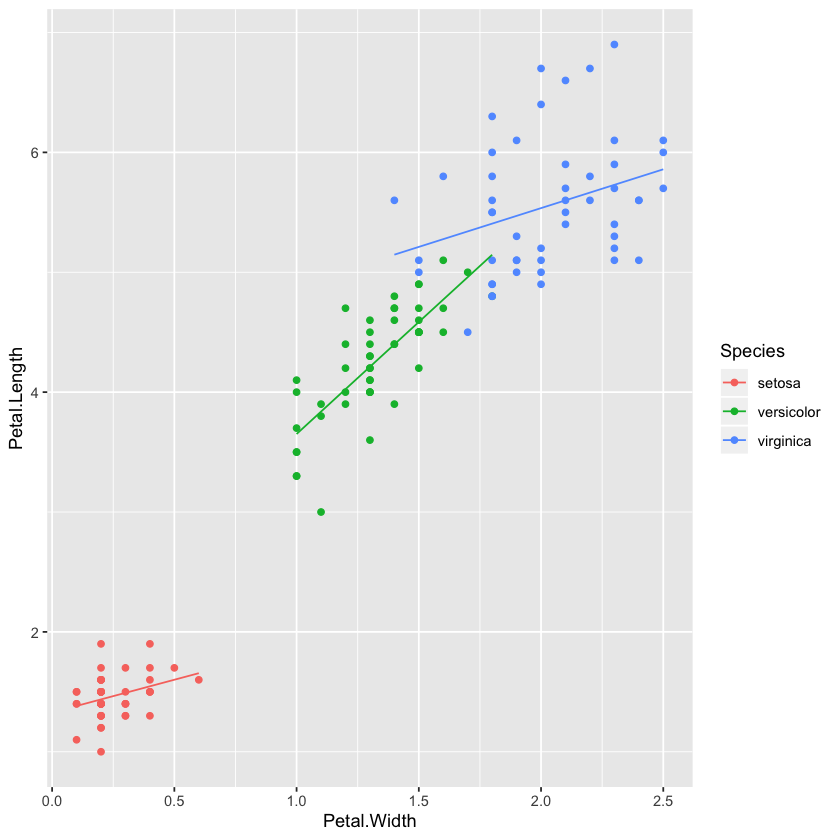